# Introduction to Time Series

## Introduction
From stock prices to climate data, time series data is found in a wide variety of domains, and being able to effectively work with such data is an increasingly important skill for data scientists. 

In this lecture, you will be introduced to some common techniques used to import/load, clean and manipulate time series data. Additionally, you'll learn how you can effectively visualize time series data in Python.

## Objectives

You will be able to:

* Load time series data using Pandas and perform time series indexing
* Perform index based slicing to create subsets of a time series
* Change the granularity of a time series 
* Perform basic data cleaning operations on time series data
* Explore the temporal structure of time series with line plots
* Understand and describe the distribution of observations using histograms and density plots
* Measure the change in distribution over intervals using box and whisker plots and heat map plots

## Loading Time Series Data

To get a sense of how to manipulate time series data, we'll walk through an example. The dataset we'll load contains daily minimum temperatures in Melbourne, Australia, from 1981-1990. The data is stored in a `.csv`-file, so our usual `pd.read_csv` can be used.

In [1]:
import pandas as pd
temp_data = pd.read_csv("min_temp.csv")
temp_data.head(15)

,Date,Daily_min
0,1/1/81,20.7
1,2/1/81,17.9
2,3/1/81,18.8
3,4/1/81,14.6
4,5/1/81,15.8
5,6/1/81,15.8
6,7/1/81,15.8
7,8/1/81,17.4
8,9/1/81,21.8
9,10/1/81,20.0


Now, let's look at the information of our data set. 

In [2]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date         3650 non-null object
Daily_min    3650 non-null float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


While working with time series data in Python, it's important to always ensure that dates are used as index values and are understood by Python as a true "date" object. This can be done either by using Pandas' `Timestamp` or base Python’s `Datetime` and is interchangeable in most cases. It’s the type used for the entries that make up a `DatetimeIndex`, and other time series oriented data structures in pandas. Further details on Timestamp can be found [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html).

We need to do two things now:
1. Make sure that we change the dates in our data sets from "non-null object" to "non-null datetime". To make sure Python understands the date correctly, a `format` argument can be passed [as specified in the documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#providing-a-format-argument).
2. Make sure that the date becomes the index.


In [3]:
# 1. convert Date to a datetime column
temp_data.Date = pd.to_datetime(temp_data.Date, format='%d/%m/%y')

In [4]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date         3650 non-null datetime64[ns]
Daily_min    3650 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [5]:
# 2. Make Date the index 
temp_data.set_index('Date', inplace=True)

In [6]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
Daily_min    3650 non-null float64
dtypes: float64(1)
memory usage: 57.0 KB


In [7]:
temp_data.head(15)

,Daily_min
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


## Resampling

### Downsampling

Note how the Date is now the index! Having the date as the index has several advantages, among others, easy visualization with dates on the x-axis, and the functionality to [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) the data. 

Pandas has a simple, powerful, and efficient functionality for performing resampling operations when converting the frequency conversion (e.g., converting monthly data into yearly data). This is very common in financial applications.

In [8]:
temp_monthly = temp_data.resample('MS')
month_mean = temp_monthly.mean()

In [9]:
month_mean.head(15)

,Daily_min
Date,
1981-01-01,17.712903
1981-02-01,17.678571
1981-03-01,13.500000
1981-04-01,12.356667
1981-05-01,9.490323
1981-06-01,7.306667
1981-07-01,7.577419
1981-08-01,7.238710
1981-09-01,10.143333


### Upsampling

In some cases, it is useful to create upsampled time series as well, especially if you're trying to merge several time series with different frequencies. You can do this by using "resample" to a time that is more frequent than the timestamp from the original time series. 

In [10]:
temp_bidaily= temp_data.resample('12H').asfreq()
temp_bidaily.head()

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,NaN
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,NaN
1981-01-03 00:00:00,18.8


In [11]:
temp_bidaily_fill= temp_data.resample('12H').ffill()
temp_bidaily_fill.head()

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,20.7
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,17.9
1981-01-03 00:00:00,18.8


## Selecting and slicing time series data

Pandas carries the ability to handle date stamp indices allowing quick and handy way of slicing data. For example, we can slice our dataset to only retrieve data points that come after the year 1985.

In [12]:
temp_1985_onwards = temp_data['1985':]
print(temp_1985_onwards.head())
print(temp_1985_onwards.tail())

            Daily_min
Date                 
1985-01-01       13.3
1985-01-02       15.2
1985-01-03       13.1
1985-01-04       12.7
1985-01-05       14.6
            Daily_min
Date                 
1990-12-27       14.0
1990-12-28       13.6
1990-12-29       13.5
1990-12-30       15.7
1990-12-31       13.0


## Missing Data

It's pretty common for a time series dataset to have missing values as real-world data tends to be messy and imperfect, just like any other type of data. The simplest way to detect missing values is either plotting the data and identifying disjoint areas of time series, or by using `DataFrame.isnull()` function to get a list of all missing values. This function can be used with `sum()` to get a total count of all missing values. 

In [14]:
temp_data.isnull().sum()

Daily_min    0
dtype: int64

In this case, there is no missing data. When data are missing, they can be handled in a multitude of ways: 
* Drop the data elements with missing values (this may result in low accuracy and loss of valuable information)
* Fill in the missing values under a defined criteria 
* Use advanced machine learning methods to predict the missing values 

in general, the`DataFrame.fillna()` function can be used along with methods like `bfill()` of `ffill()` as an argument/criterion for filling in Null values . `bfill()` (backward filling) looks for the next valid entry in the time series and fills the gaps with this value. Similarly, `ffill()` can be used to copy forward the previous valid entry of the time series.

## Visualizing time series data

Visualizations play an important role in time series analysis. Time series data naturally lends itself to visualization techniques for identifying rises, falls, trends and noise, etc. Plotting raw time series allows data diagnostics to identify certain trends or events.

In what follows, we'll use a data set downloaded from datamarket.com. The data set contains information on the average monthly returns of the NYSE between 1961 and 1966.

In [15]:
import pandas as pd
import numpy as np

In [16]:
nyse = pd.read_csv("NYSE_monthly.csv")
col_name= 'Month'
nyse[col_name] = pd.to_datetime(nyse[col_name])
nyse.set_index(col_name, inplace=True)

nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


## Time series line plot

Line plots are the most common technique for visualizing time series data as they can clearly show change over time. Using the convention, time is shown on the x-axis with the observation values along the y-axis.

Let's use the simple `Series.plot()` function to draw the line graph for the `nyse` series. 

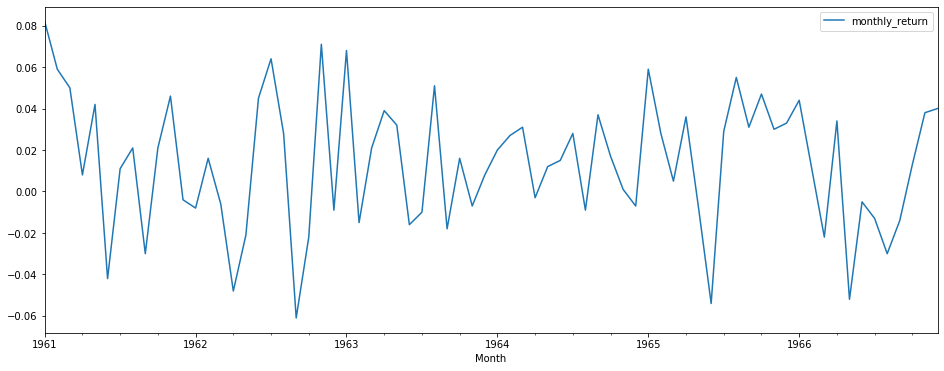

In [17]:
# Draw a line plot using nyse and .plot() function. 
import matplotlib.pyplot as plt
%matplotlib inline

nyse.plot(figsize = (16,6));

## Time series dot plot

For some time series, you may want to change the style of a line plot for a more refined visualization with a higher resolution of events. These time series are not very dense so it might be useful to change from a continuous line to dots because this representation might be misleading. 
You can change the continuous line to dots, each representing one entry in the time series. This can be achieved by changing the `style` parameter of the line plot. Let's pass `style='b.` as an argument to `.plot()` function.

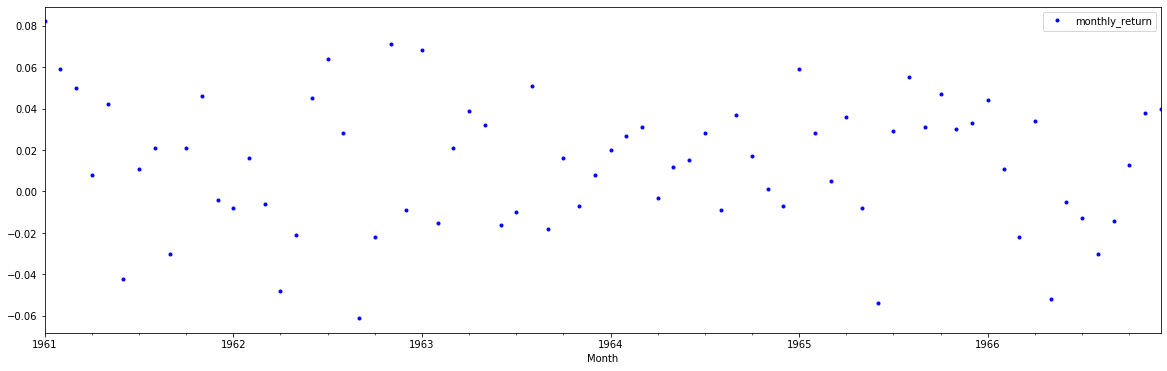

In [18]:
# Draw a dot plot using temp and .plot() function. 
nyse.plot(figsize = (20,6), style = ".b");

It's not a surprise to see that the general pattern looks very much similar to the line plot, however, we can identify some outliers that represent very low and very high return months. Dot plots can prove to be very helpful in identifying outliers and very small patterns which may not be so obvious otherwise. 

In the dataset, the NYSE returns span 6 years. We can group data by year and create a line plot for each year for direct comparison.

## Grouping and Visualizing Time Series Data

Now, we'll look at how a time series can be regrouped for a given time interval, i.e. weekly/monthly/yearly average values and compare them to identify any changes taking place over time. 
We'll use the `Pandas.grouper()` method to achieve this. Detailed documentation of this method can be accessed at [this](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Grouper.html) location. 

1. Import pandas grouper and use it to group values by year.

> **`series.groupby(pd.Grouper(freq = ‘A’))`**

Here, A refers to annual frequency. The list of aliases for time series frequencies can be found [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases).

2. Enumerate the groups and observations for each year in a new DataFrame.

3. Plot the DataFrame and visualize each column as a subplot. 


In [19]:
# Use pandas grouper to group values using annual frequency
year_groups = nyse.groupby(pd.Grouper(freq ='A'))

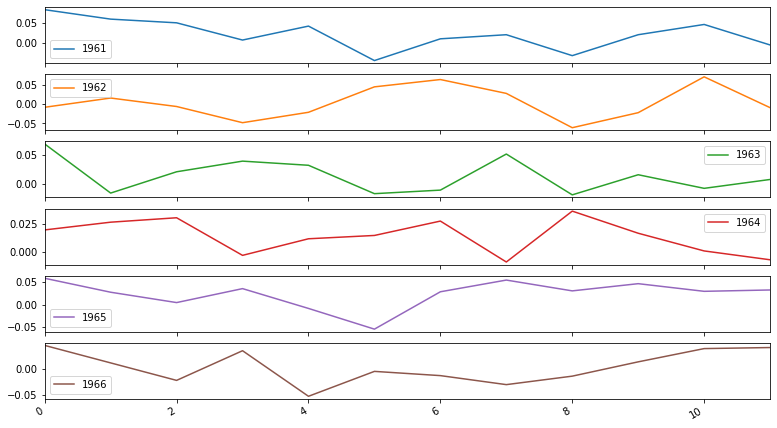

In [20]:
#Create a new DataFrame and store yearly values in columns 
nyse_annual = pd.DataFrame()

for yr, group in year_groups:
    nyse_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
nyse_annual.plot(figsize = (13,8), subplots=True, legend=True);

We can see 6 subplots, one for each year. Each plot is 12 months in length following the annual frequency.

In some cases, it may also be a good idea to plot these groups in an overlapping manner for a direct comparison. Disabling subplots can help us achieve this.

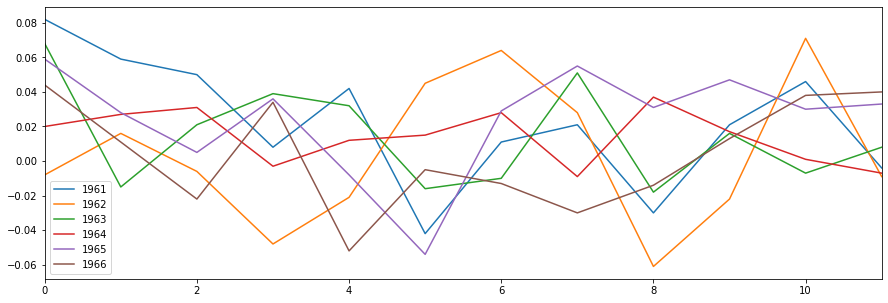

In [21]:
# Plot overlapping yearly groups 
nyse_annual.plot(figsize = (15,5), subplots=False, legend=True);

## Time Series Histogram and Density Plots

Another important visualization shows the distribution of observations themselves. This means a plot of the values without the temporal ordering.

Most linear time series forecasting methods assume a well-behaved distribution of observations e.g. a normal distribution. This can be explicitly checked using tools like statistical hypothesis tests we saw during hypothesis testing exercises. Visualizing these distributions can provide a useful first check of the distribution of observations both on raw observations and after any type of data transformation has been performed.

We will now create a histogram plot of the observations in the dataset using `hist()`. 

>A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

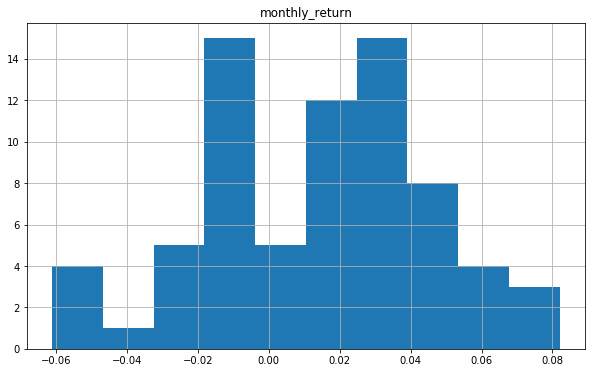

In [21]:
nyse.hist(figsize = (10,6));

The plot shows a distribution that doesn't exactly look Gaussian/Normal. The plotting function automatically selected the size of the bins based on the spread of values in the data here. Let's see what happens if we set the number of bins equal to 7.

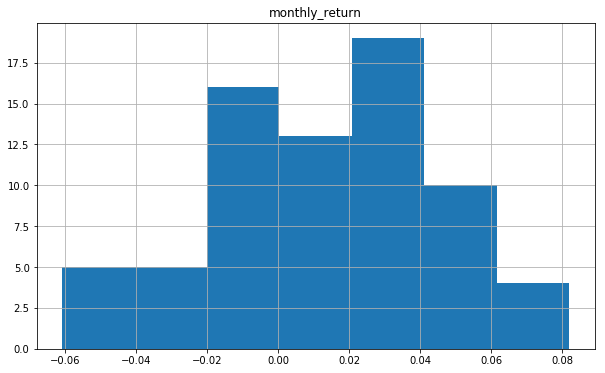

In [22]:
nyse.hist(figsize = (10,6), bins = 7);

This already looks more normal. With stock exchange returns, it is to be expected that on average, the returns will be 0 and have a Gaussian distribution around that. With only 6 years of monthly data, it is to be expected that the distribution does not exactly look Gaussian. 

We can also get a better idea of the shape of the distribution of observations by using a density plot which is like the histogram, except a function is used to fit the distribution of observations with smoothing to summarize this distribution.

Let's plot a density plot of the NYSE stock exchange data. We will achieve this by setting the `kind` parameter of the `plot()` function to "kde", which stands for Kernel Density Estimation.

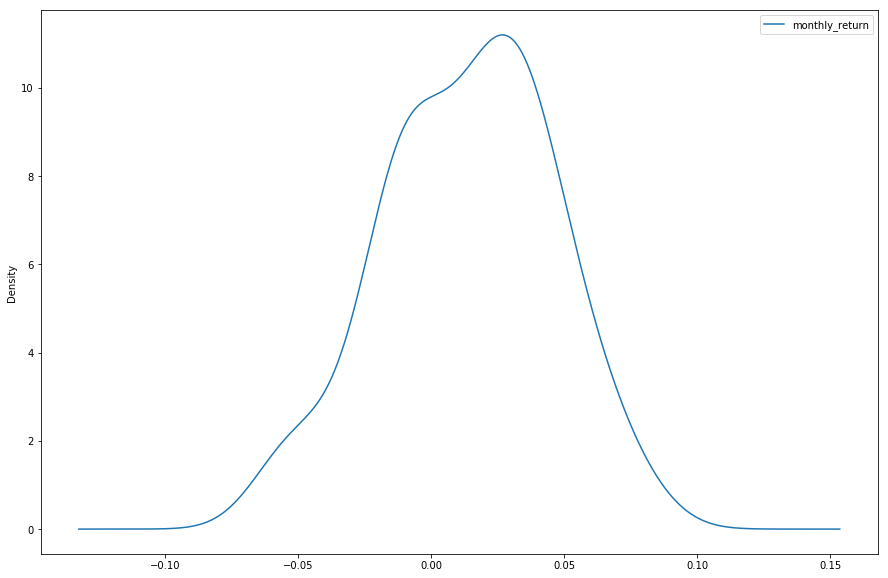

In [23]:
# Plot a density plot for temperature dataset
nyse.plot(kind='kde', figsize = (15,10));

We can see that the density plot provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is more Gaussian than we were able to see in the histogram.

Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution.

## Time series box and whisker plots by year

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by **time interval**.

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extent of the observations. Dots are drawn for outliers outside the whiskers or extent of the data.

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

Let's use our groups by years DataFrame to plot a box and whisker plot for each year,  side-by-side, for direct comparison using `boxplot()`.

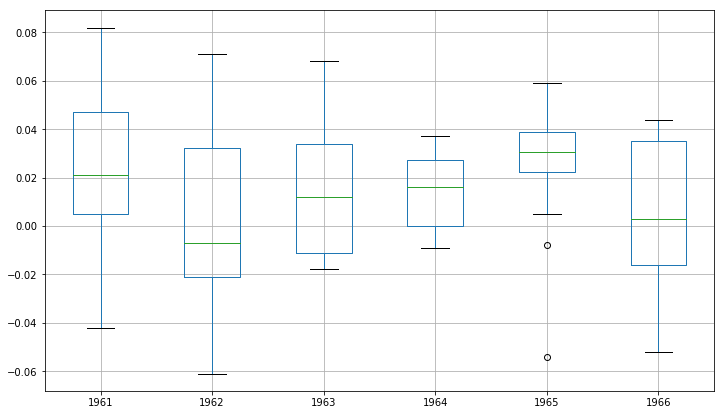

In [24]:
# Generate a box and whiskers plot for temp_annual dataframe
nyse_annual.boxplot(figsize = (12,7));

Comparing box and whisker plots by consistent intervals is a useful tool. Within an interval, it can help to spot outliers (dots above or below the whiskers).

Across intervals, we can look for multiple year trends, seasonality, and other structural information that could be modeled. Seasonality is generally not a thing in financial data, but in the lab that follows you'll, explore visualizing seasonal temperature data!

## Time series heat maps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color. This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens). Like the box and whisker plots, we can compare observations between intervals using a heat map.

In the case of our NYSE dataset, the observations can be arranged into a matrix of year-columns and month-rows, with monthly returns in the cell for each day. A heat map of this matrix can then be plotted.

We'll now create a heatmap of the Minimum Daily Temperatures data. The `matshow()` function from the matplotlib library is used as no heatmap support is provided directly in Pandas.

1. Rotate (transpose) the `nyse_annual` dataframe as a new matrix so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.

2. Use `matshow()` function to draw a heatmap for the transposed yearly matrix. Details on matshow can be accessed [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html).

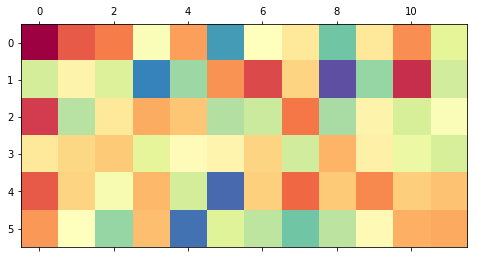

In [25]:
year_matrix = nyse_annual.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

Orange/red colors represent higher values, blue represents low values, green represents values in the middle. Heatplots will make more sense after you've gone through the lab which will follow later and examine the Australian temperature data.

## Additional reading

An overview of Pandas time series functionality can be found [here](https://pandas.pydata.org/pandas-docs/stable/timeseries.html).

Some more manipulation tricks can be found [here](https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea).

## Summary

In this introductory lesson, we learned how to create a time series object in Python using Pandas. We learned how to fulfill all the requirements for a dataset to be classified as a time series by ensuring timestamp values as data index. Basic data handling techniques for getting time series data ready for further analysis were introduced. We also learned how to explore the temporal relationships with line, scatter, and autocorrelation plots. We also explored the distribution of observations with histograms and density plots and change in distribution of observations with box and whisker and heat map plots.